In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [78]:
import pandas as pd
url = "https://raw.githubusercontent.com/nishithkotak/machine-learning/refs/heads/master/ex1data2.txt"
columns = ['area','rooms','price']
data = pd.read_csv(url, names=columns, header=None)
data.head()

,area,rooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [79]:
print(data.shape)
data.describe()

(47, 3)


,area,rooms,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [80]:
area = data.iloc[0:data.shape[0],0:1]
rooms = data.iloc[0:data.shape[0],1:2]
price = data.iloc[0:data.shape[0],2:3]

In [81]:
print(area.shape)
print(rooms.shape)
print(price.shape)

(47, 1)
(47, 1)
(47, 1)


In [82]:
def feature_normalization(x):
    mean=np.mean(x,axis=0)
    std=np.std(x,axis=0)
    x_norm=(x-mean)/std
    return x_norm, mean, std

In [83]:
data_norm = data.values
n=data_norm.shape[0]
x2=data_norm[:,0:2].reshape(n,2)
x2_norm, mean, features = feature_normalization(x2)
y2=data_norm[:,2:3].reshape(n,1)



In [84]:
x2_norm

array([[ 1.31415422e-01, -2.26093368e-01],
       [-5.09640698e-01, -2.26093368e-01],
       [ 5.07908699e-01, -2.26093368e-01],
       [-7.43677059e-01, -1.55439190e+00],
       [ 1.27107075e+00,  1.10220517e+00],
       [-1.99450507e-02,  1.10220517e+00],
       [-5.93588523e-01, -2.26093368e-01],
       [-7.29685755e-01, -2.26093368e-01],
       [-7.89466782e-01, -2.26093368e-01],
       [-6.44465993e-01, -2.26093368e-01],
       [-7.71822042e-02,  1.10220517e+00],
       [-8.65999486e-04, -2.26093368e-01],
       [-1.40779041e-01, -2.26093368e-01],
       [ 3.15099326e+00,  2.43050370e+00],
       [-9.31923697e-01, -2.26093368e-01],
       [ 3.80715024e-01,  1.10220517e+00],
       [-8.65782986e-01, -1.55439190e+00],
       [-9.72625673e-01, -2.26093368e-01],
       [ 7.73743478e-01,  1.10220517e+00],
       [ 1.31050078e+00,  1.10220517e+00],
       [-2.97227261e-01, -2.26093368e-01],
       [-1.43322915e-01, -1.55439190e+00],
       [-5.04552951e-01, -2.26093368e-01],
       [-4.

In [85]:
theta2=np.zeros((3,1))

In [86]:
x2_norm

array([[ 1.31415422e-01, -2.26093368e-01],
       [-5.09640698e-01, -2.26093368e-01],
       [ 5.07908699e-01, -2.26093368e-01],
       [-7.43677059e-01, -1.55439190e+00],
       [ 1.27107075e+00,  1.10220517e+00],
       [-1.99450507e-02,  1.10220517e+00],
       [-5.93588523e-01, -2.26093368e-01],
       [-7.29685755e-01, -2.26093368e-01],
       [-7.89466782e-01, -2.26093368e-01],
       [-6.44465993e-01, -2.26093368e-01],
       [-7.71822042e-02,  1.10220517e+00],
       [-8.65999486e-04, -2.26093368e-01],
       [-1.40779041e-01, -2.26093368e-01],
       [ 3.15099326e+00,  2.43050370e+00],
       [-9.31923697e-01, -2.26093368e-01],
       [ 3.80715024e-01,  1.10220517e+00],
       [-8.65782986e-01, -1.55439190e+00],
       [-9.72625673e-01, -2.26093368e-01],
       [ 7.73743478e-01,  1.10220517e+00],
       [ 1.31050078e+00,  1.10220517e+00],
       [-2.97227261e-01, -2.26093368e-01],
       [-1.43322915e-01, -1.55439190e+00],
       [-5.04552951e-01, -2.26093368e-01],
       [-4.

In [87]:
def cost_function(theta_array, x1_value, x2_train, y_value, m):
    total_error = 0
    for i in range(m):
        total_error += ((theta_array[0] + theta_array[1]*x1_value[i] + x2_train[i]*theta_array[2]) - y_value[i])**2
    return total_error/(2*m)

In [95]:
#initialize regularization parameters
# initializing values of thetas
theta_0 = 0  # bias
theta_1 = 0  # weight of 1st feature
theta_2 = 0 # weight of 2nd feature

# defining a learning rate
alpha = 0.01

# Setting the number of iterations
iters = 500

In [89]:
def hypothesis(theta_array, x1,x2):
    return theta_array[0] + theta_array[1]*x1+ theta_array[2]*x2

In [90]:
#update the values of theta by gradient descent
def improvise_thetas(theta_array, X1,X2, Y, alpha, m):
    ''' This function updates the values of theta_0 and theta_1 and returns an array containing
            the updated theta values. This is where gradient descent takes place '''

    # initializing summations to zero
    summation_0 = 0
    summation_1 = 0
    summation_2 = 0
    for i in range(m):        # finding the value of summations and finally the value of
        summation_0 += (theta_array[0] + theta_array[1]*X1[i]+theta_array[2]*X2[i]) - Y[i]

        summation_1 += X1[i]*((theta_array[0] + theta_array[1]*X1[i]+theta_array[2]*X2[i])-Y[i])
        summation_2 += X2[i]*((theta_array[0] + theta_array[1]*X1[i]+theta_array[2]*X2[i])-Y[i])

    new_theta_0 = theta_array[0] - alpha * (summation_0) / m
    new_theta_1 = theta_array[1] - alpha * (summation_1) / m
    new_theta_2 = theta_array[2] - alpha * (summation_2) / m

    updated_theta_array = [new_theta_0, new_theta_1,new_theta_2]
    print(updated_theta_array)
    return updated_theta_array
     

In [103]:
#minimizing cost function error
def training(x1_train,x2_train, y_train, alpha, iters):
    # This is the function which takes care of the Regression

    # Finding size of the training data
    m = x1_train.size
    print(m)
    # initializing values of thetas
    theta_0 = 0     # bias
    theta_1 = 0     # weight
    theta_2 = 0

    # creating a weight matrix which contains both theta_0 and theta_1
    theta_array = [theta_0, theta_1, theta_2]

    # creating an array that stores the values of the cost function during each iteration
    cost_function_values = []

    for i in range(iters):
        # changing the values of theta 0 and theta 1 according to the gradient descent method
        theta_array = improvise_thetas(theta_array, x1_train,x2_train, y_train, alpha, m)

        # storing values of the cost function after every improvisation step (gradient descent step)
        cost_function_values.append(cost_function(theta_array, x1_train, x2_train, y_train, m))

        # print values every 10 iterations
        if i % 10 == 0:
            print('value of theta_0 at iteration %d is: ' % i, theta_array[0])
            print('value of theta_1 at iteration %d is: ' % i, theta_array[1])
            print('value of theta_2 at iteration %d is: ' % i, theta_array[2], '\n')
            ynew=x1_train*theta_array[1]+x2_train*theta_array[2]+theta_array[0]
            #plt.plot(x_train1,ynew,'r')
            #plt.scatter(x_train1,y_train)
            #plt.show()

    # Plot our cost function's progress over our training period to check if the model has learnt
    x = np.arange(0, len(cost_function_values), step=1)
    plt.plot(x, cost_function_values, "-b", label="Cost Function Curve")
    plt.title("Learning Curve")
    plt.xlabel("Number Of Iterations")
    plt.ylabel("Cost Function Value")
    plt.legend()
    plt.show()
    print("Cost function values: ",cost_function_values)
    # By returning our theta_array and saving it we are basically saving our trained model
    return theta_array, cost_function_values

47
[np.float64(3404.1265957446813), np.float64(1057.641334928156), np.float64(547.0882175586962)]
value of theta_0 at iteration 0 is:  3404.1265957446813
value of theta_1 at iteration 0 is:  1057.641334928156
value of theta_2 at iteration 0 is:  547.0882175586962 

[np.float64(6774.211925531915), np.float64(2101.6427419099055), np.float64(1082.7831083266876)]
[np.float64(10110.596402021276), np.float64(3132.204419118224), np.float64(1607.2749846950765)]
[np.float64(13413.617033745744), np.float64(4149.523497057381), np.float64(2120.751134886942)]
[np.float64(16683.60745915297), np.float64(5153.794086173976), np.float64(2623.3958703769586)]
[np.float64(19920.89798030612), np.float64(6145.207323726331), np.float64(3115.390572570213)]
[np.float64(23125.81559624774), np.float64(7123.951419923801), np.float64(3596.9137387517785)]
[np.float64(26298.684036029943), np.float64(8090.2117033473905), np.float64(4068.141027318431)]
[np.float64(29439.823791414325), np.float64(9044.170665662881), np.

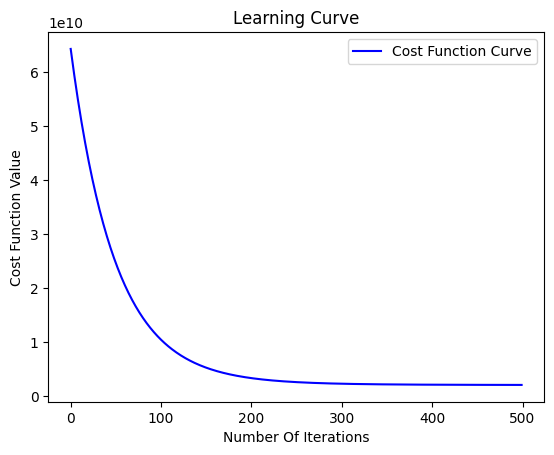

Cost function values:  [np.float64(64297776251.62009), np.float64(63031018305.52133), np.float64(61790694237.532486), np.float64(60576236901.99104), np.float64(59387091739.988594), np.float64(58222716488.38939), np.float64(57082580895.8954), np.float64(55966166445.97887), np.float64(54872966086.50778), np.float64(53802483965.89505), np.float64(52754235175.605446), np.float64(51727745498.85994), np.float64(50722551165.38097), np.float64(49738198612.02587), np.float64(48774244249.16026), np.float64(47830254232.62681), np.float64(46905804241.168976), np.float64(46000479259.17251), np.float64(45113873364.59137), np.float64(44245589521.92843), np.float64(43395239380.144295), np.float64(42562443075.3712), np.float64(41746829038.31239), np.float64(40948033806.209465), np.float64(40165701839.264984), np.float64(39399485341.40871), np.float64(38649044085.30025), np.float64(37914045241.46274), np.float64(37194163211.445404), np.float64(36489079464.915146), np.float64(35798482380.58049), np.float

In [108]:
cost_value, theta_array = training(x2_norm[:,0], x2_norm[:,1], y2.flatten(), alpha, iters)

print("the final value of theta_0 is ", theta_array[0])
print("the final value of theta_1 is ", theta_array[1])
print("the final value of theta_2 is ", theta_array[2])


In [109]:
theta_array

[np.float64(64297776251.62009),
 np.float64(63031018305.52133),
 np.float64(61790694237.532486),
 np.float64(60576236901.99104),
 np.float64(59387091739.988594),
 np.float64(58222716488.38939),
 np.float64(57082580895.8954),
 np.float64(55966166445.97887),
 np.float64(54872966086.50778),
 np.float64(53802483965.89505),
 np.float64(52754235175.605446),
 np.float64(51727745498.85994),
 np.float64(50722551165.38097),
 np.float64(49738198612.02587),
 np.float64(48774244249.16026),
 np.float64(47830254232.62681),
 np.float64(46905804241.168976),
 np.float64(46000479259.17251),
 np.float64(45113873364.59137),
 np.float64(44245589521.92843),
 np.float64(43395239380.144295),
 np.float64(42562443075.3712),
 np.float64(41746829038.31239),
 np.float64(40948033806.209465),
 np.float64(40165701839.264984),
 np.float64(39399485341.40871),
 np.float64(38649044085.30025),
 np.float64(37914045241.46274),
 np.float64(37194163211.445404),
 np.float64(36489079464.915146),
 np.float64(35798482380.58049),
 

In [110]:
predict=hypothesis(theta_array,2,1416)     #making predictions using the optimized Θ values for a 1650 square feet house with 3 bedrooms
predict

np.float64(87685982853208.66)